In [20]:
import yfinance as yf
from datetime import date
import pandas as pd 
from pandas.plotting import scatter_matrix

# Purpose

This notebook is where I am going to explore making my own transformers and pipelines

In [21]:
ticker = yf.Ticker('BTC')
df = ticker.history(start=date(2021, 5, 1), end=date(2021, 7, 1))
df.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

In [22]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2021-05-03,98.910004,98.945000,98.910004,98.944603,2307
2021-05-04,98.959999,99.050003,98.959999,98.985001,2847
2021-05-05,99.000000,99.059998,98.994003,99.059998,2950
2021-05-06,99.099998,99.100998,99.030998,99.074997,4313
2021-05-07,99.150002,99.214996,99.147499,99.147499,1834
2021-05-10,99.199997,99.199997,99.070000,99.110001,2968
2021-05-11,99.110001,99.110001,99.110001,99.110001,0


C:\Users\jebli_000\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:xlabel='Open', ylabel='Open'>,
        <AxesSubplot:xlabel='High', ylabel='Open'>,
        <AxesSubplot:xlabel='Low', ylabel='Open'>,
        <AxesSubplot:xlabel='Close', ylabel='Open'>,
        <AxesSubplot:xlabel='Volume', ylabel='Open'>],
       [<AxesSubplot:xlabel='Open', ylabel='High'>,
        <AxesSubplot:xlabel='High', ylabel='High'>,
        <AxesSubplot:xlabel='Low', ylabel='High'>,
        <AxesSubplot:xlabel='Close', ylabel='High'>,
        <AxesSubplot:xlabel='Volume', ylabel='High'>],
       [<AxesSubplot:xlabel='Open', ylabel='Low'>,
        <AxesSubplot:xlabel='High', ylabel='Low'>,
        <AxesSubplot:xlabel='Low', ylabel='Low'>,
        <AxesSubplot:xlabel='Close', ylabel='Low'>,
        <AxesSubplot:xlabel='Volume', ylabel='Low'>],
       [<AxesSubplot:xlabel='Open', ylabel='Close'>,
        <AxesSubplot:xlabel='High', ylabel='Close'>,
        <AxesSubplot:xlabel='Low', ylabel='Close'>,
        <AxesSubplot:xlabel='Close', ylabel='Close'>,
    

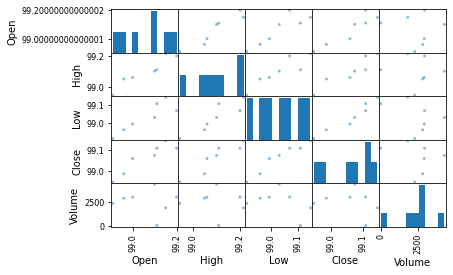

In [23]:
scatter_matrix(df)

In [24]:
df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.940695,0.882901,0.920448,-0.093660
High,0.940695,1.000000,0.897465,0.921267,-0.080372
Low,0.882901,0.897465,1.000000,0.963505,-0.410633
Close,0.920448,0.921267,0.963505,1.000000,-0.234734
Volume,-0.093660,-0.080372,-0.410633,-0.234734,1.000000


In [25]:
# Transformer to take the percent change between Close and Open
#This is close-open/open
from sklearn.base import BaseEstimator, TransformerMixin

class PercentChangeEstimator(BaseEstimator, TransformerMixin):
    def __init__(self, earlier_column_name='', later_column_name=''):
        self.earlier_column_name = earlier_column_name
        self.later_column_name = later_column_name

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return 100*(X[self.later_column_name]-X[self.earlier_column_name])/X[self.earlier_column_name]


# pce = PercentChangeEstimator(earlier_column_name='Open', later_column_name='Close')
# print(pce)
# df['Percent_Change'] = pce.transform(df)
df.head()



,Open,High,Low,Close,Volume
Date,,,,,
2021-05-03,98.910004,98.945000,98.910004,98.944603,2307
2021-05-04,98.959999,99.050003,98.959999,98.985001,2847
2021-05-05,99.000000,99.059998,98.994003,99.059998,2950
2021-05-06,99.099998,99.100998,99.030998,99.074997,4313
2021-05-07,99.150002,99.214996,99.147499,99.147499,1834


In [27]:
# Now seeing if it works in a pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('pct_change', PercentChangeEstimator(earlier_column_name='Open', later_column_name='Close'))])
df = pipeline.fit_transform(df)
df.head()

KeyError: 'Close'